#### PACKAGES FOR ANALYSIS

In [1]:
import numpy as np  #Numpy
import pandas as pd #Pandas
import matplotlib.pyplot as plt #Visualization Package
import seaborn as sns #Visualization Package
import datetime as dt #It a Data time package
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("Online Retail.xlsx") # Read Data using pandas
data.head() # display's First Five Elements

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# check missing values for each column 
total=data.isnull().sum().sort_values(ascending=False)
percentage=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing_data=pd.concat([total,percentage],axis=1,keys=['total','percentage'])
missing_data.head(10)

,total,percentage
CustomerID,135080,24.926694
Description,1454,0.268311
Country,0,0.000000
UnitPrice,0,0.000000
InvoiceDate,0,0.000000
Quantity,0,0.000000
StockCode,0,0.000000
InvoiceNo,0,0.000000


In [5]:
data.dropna(subset=["CustomerID"],inplace=True) # Here subset is used for delete the rows having null

In [6]:
# check missing values for each column 
total=data.isnull().sum().sort_values(ascending=False)
percentage=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing_data=pd.concat([total,percentage],axis=1,keys=['total','percentage'])
missing_data.head(10)

,total,percentage
Country,0,0.0
CustomerID,0,0.0
UnitPrice,0,0.0
InvoiceDate,0,0.0
Quantity,0,0.0
Description,0,0.0
StockCode,0,0.0
InvoiceNo,0,0.0


### Univariate analysis

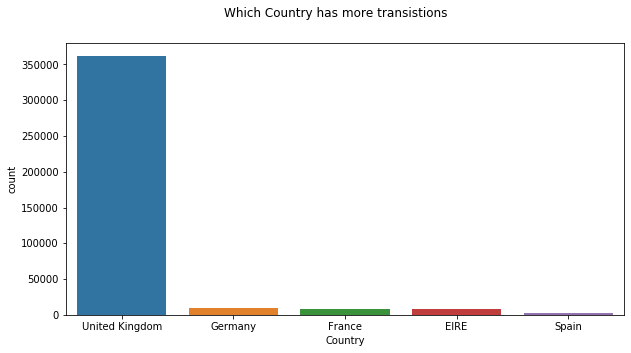

In [7]:
from matplotlib.pyplot import suptitle
plt.subplots(figsize=(10,5))
suptitle("Which Country has more transistions")
sns.countplot(x="Country",order=data.Country.value_counts().iloc[:5].index,data=data,)
plt.show()

In [8]:
data.Country.value_counts().head(5)

United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: Country, dtype: int64

In [9]:
UKclass=data[data["Country"]=="United Kingdom"]

In [10]:
UKclass.shape

(361878, 8)

#### Lets check the number of unique invoices and Number of unique customers

In [11]:
UKclass["InvoiceNo"].nunique()

19857

In [12]:
UKclass.CustomerID.nunique()

3950

In [13]:
UKclass["Total_Price"]=UKclass["UnitPrice"]*UKclass["Quantity"]
UKclass.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### check what is minmum and maximum dates in InvoiceDate

In [14]:
print("minimum date is : {}, maximum date is : {}".format(UKclass['InvoiceDate'].min(),UKclass['InvoiceDate'].max()))

minimum date is : 2010-12-01 08:26:00, maximum date is : 2011-12-09 12:49:00


#### lets calculate the date from the last purchase

In [15]:
studydate=UKclass['InvoiceDate'].max()
UKclass["Days_From_Last_purchase"]=studydate-UKclass['InvoiceDate']
UKclass["Days_From_Last_purchase"].astype('timedelta64[D]')
UKclass["Days_From_Last_purchase"]=UKclass["Days_From_Last_purchase"] / np.timedelta64(1, 'D')
UKclass.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Days_From_Last_purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373.182639
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.182639
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373.182639
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.182639
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.182639


#### RFM TABLE

In [16]:
RFMTable= UKclass.groupby('CustomerID').agg({'Days_From_Last_purchase': lambda x:x.min(),# Recency
                                             'CustomerID': lambda x: len(x), # Frequency
                                             'Total_Price': lambda x: x.sum()}) # Monetary ValueS

#### RENAME THE COLUMN NAMES

In [17]:
RFMTable.rename(columns={'Days_From_Last_purchase': 'Recency',
                         'CustomerID': 'Frequency', 
                         'Total_Price': 'Monetary_value'}, inplace=True)

In [18]:
RFMTable.head()

,Recency,Frequency,Monetary_value
CustomerID,,,
12346.0,325.105556,2.0,0.00
12747.0,1.927083,103.0,4196.01
12748.0,0.020139,4642.0,29072.10
12749.0,3.120139,231.0,3868.20
12820.0,2.900694,59.0,942.34


In [19]:
UKclass.loc[UKclass['CustomerID'] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Days_From_Last_purchase
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,325.116667
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,325.105556


#### Let create a quantile score for the RFM

In [20]:
RFMTable.describe()

,Recency,Frequency,Monetary_value
count,3950.000000,3950.000000,3950.000000
mean,91.307281,91.614684,1713.385669
std,100.235418,220.557389,6548.608224
min,0.000000,1.000000,-4287.630000
25%,16.146007,17.000000,282.255000
50%,49.732639,41.000000,627.060000
75%,142.959375,101.000000,1521.782500
max,373.122222,7983.000000,256438.490000


### lets create RFM QUANTILES

In [21]:
quartiles =RFMTable.quantile(q=[0.25,0.50,0.75])
quartiles

,Recency,Frequency,Monetary_value
0.25,16.146007,17.0,282.2550
0.50,49.732639,41.0,627.0600
0.75,142.959375,101.0,1521.7825


In [22]:
quartiles=quartiles.to_dict()
quartiles

{'Recency': {0.25: 16.146006944444444,
  0.5: 49.732638888888886,
  0.75: 142.959375},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 101.0},
 'Monetary_value': {0.25: 282.255, 0.5: 627.0600000000001, 0.75: 1521.7825}}

In [23]:
# Arguments (x = value, p =recency, frequency d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p =  frequency, d= quartiles dict)
def FScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
# Arguments (x = value, p = monetary_value, d= quartiles dict)
def MScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [24]:
RFMSEGMENT=RFMTable
RFMSEGMENT['R'] = RFMSEGMENT['Recency'].apply(RScore, args=('Recency',quartiles,))
RFMSEGMENT['F'] = RFMSEGMENT['Frequency'].apply(FScore, args=('Frequency',quartiles,))
RFMSEGMENT['M'] = RFMSEGMENT['Monetary_value'].apply(MScore, args=('Monetary_value',quartiles,))

In [25]:
RFMSEGMENT['RFM']=RFMSEGMENT.R.map(str) \
                  +RFMSEGMENT.F.map(str) \
                  +RFMSEGMENT.M.map(str)

In [26]:
RFMSEGMENT.head()

,Recency,Frequency,Monetary_value,R,F,M,RFM
CustomerID,,,,,,,
12346.0,325.105556,2.0,0.00,1,1,1,111
12747.0,1.927083,103.0,4196.01,4,4,4,444
12748.0,0.020139,4642.0,29072.10,4,4,4,444
12749.0,3.120139,231.0,3868.20,4,4,4,444
12820.0,2.900694,59.0,942.34,4,3,3,433


In [27]:
RFMSEGMENT.sort_values(by=['RFM', 'Monetary_value'], ascending=[True, False])

,Recency,Frequency,Monetary_value,R,F,M,RFM
CustomerID,,,,,,,
14242.0,234.043750,16.0,280.55,1,1,1,111
13803.0,254.994444,17.0,277.07,1,1,1,111
16810.0,191.886806,16.0,275.64,1,1,1,111
18190.0,191.917361,16.0,274.51,1,1,1,111
14816.0,196.981250,4.0,271.85,1,1,1,111
...,...,...,...,...,...,...,...
15701.0,1.923611,237.0,1542.14,4,4,4,444
12877.0,3.096528,154.0,1535.77,4,4,4,444
16283.0,5.028472,168.0,1531.51,4,4,4,444


In [28]:
RFMM=pd.DataFrame(RFMSEGMENT.groupby('RFM').agg('Monetary_value').mean())

In [29]:
RFMM.head()

,Monetary_value
RFM,
111,106.877437
112,369.510842
113,864.238182
114,6154.412000
121,183.030103


#### total score

In [30]:
RFMSEGMENT['Total Score'] =RFMSEGMENT['R'] +RFMSEGMENT['F'] +RFMSEGMENT['M']

In [31]:
RFMSEGMENT.head()

,Recency,Frequency,Monetary_value,R,F,M,RFM,Total Score
CustomerID,,,,,,,,
12346.0,325.105556,2.0,0.00,1,1,1,111,3
12747.0,1.927083,103.0,4196.01,4,4,4,444,12
12748.0,0.020139,4642.0,29072.10,4,4,4,444,12
12749.0,3.120139,231.0,3868.20,4,4,4,444,12
12820.0,2.900694,59.0,942.34,4,3,3,433,10


In [32]:
RFMSEGMENT.groupby('Total Score').agg('Monetary_value').mean()

Total Score
3      106.877437
4      217.335635
5      335.037036
6      485.488320
7      705.780855
8      894.684241
9     1329.058558
10    1709.333081
11    3544.213609
12    7803.163158
Name: Monetary_value, dtype: float64

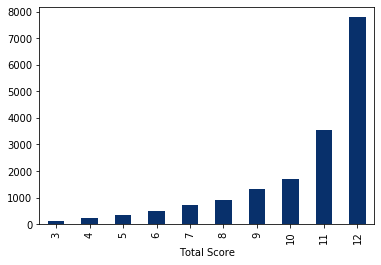

In [33]:
RFMSEGMENT.groupby('Total Score').agg('Monetary_value').mean().plot(kind='bar', colormap='Blues_r')

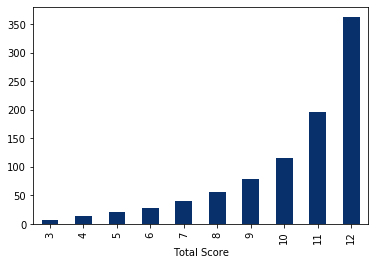

In [34]:
RFMSEGMENT.groupby('Total Score').agg('Frequency').mean().plot(kind='bar', colormap='Blues_r')

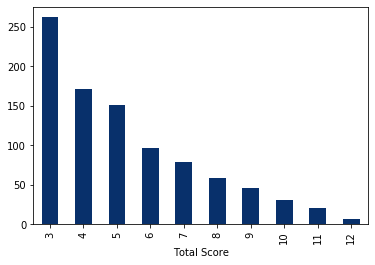

In [35]:
RFMSEGMENT.groupby('Total Score').agg('Recency').mean().plot(kind='bar', colormap='Blues_r')

### Pareto’s rule
Before moving to customer segments, Let's see the application of Pareto Principle – commonly referred to as the 80-20 rule on our dataset by applying it to our RFM variables.

Pareto’s rule says 80% of the results come from 20% of the causes.

Similarly, 20% customers contribute to 80% of your total revenue. Let's verify that because that will help us know which customers to focus on when marketing new products.

In [36]:
#get the 80% of the revenue
pareto_cutoff =RFMSEGMENT['Monetary_value'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  5414298.72


In [37]:
customers_rank = RFMSEGMENT
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary_value'].rank(ascending=0)
customers_rank.head()

,Recency,Frequency,Monetary_value,R,F,M,RFM,Total Score,Rank
CustomerID,,,,,,,,,
12346.0,325.105556,2.0,0.00,1,1,1,111,3,3908.0
12747.0,1.927083,103.0,4196.01,4,4,4,444,12,273.0
12748.0,0.020139,4642.0,29072.10,4,4,4,444,12,22.0
12749.0,3.120139,231.0,3868.20,4,4,4,444,12,306.0
12820.0,2.900694,59.0,942.34,4,3,3,433,10,1486.0


#### Top Customers

In [38]:
customers_rank.sort_values('Rank',ascending=True)

,Recency,Frequency,Monetary_value,R,F,M,RFM,Total Score,Rank
CustomerID,,,,,,,,,
18102.0,0.040972,433.0,256438.49,4,4,4,444,12,1.0
17450.0,7.972222,351.0,187482.17,4,4,4,444,12,2.0
17511.0,2.109028,1076.0,88125.38,4,4,4,444,12,3.0
16684.0,3.946528,281.0,65892.08,4,4,4,444,12,4.0
13694.0,3.136806,585.0,62653.10,4,4,4,444,12,5.0
...,...,...,...,...,...,...,...,...,...
15823.0,336.993750,17.0,-840.76,1,1,1,111,3,3946.0
17603.0,49.729167,15.0,-1165.30,3,1,1,311,5,3947.0
14213.0,371.126389,5.0,-1192.20,1,1,1,111,3,3948.0


In [39]:
#get top 20% of the customers
top_20_cutoff = 3950*20 /100
top_20_cutoff

790.0

In [40]:
#sum the monetary values over the customer with rank <=44.8
revenueByTop20 = customers_rank[customers_rank['Rank'] <= 790]['Monetary_value'].sum()
revenueByTop20

4891760.521

In our case, the 80% of total revenue is not achieved by the 20% of TOP customers but approximately, it does, because they are less than our 20% TOP customers who achieve it. It would be interesting to study this group of customers because they are those who make our most revenue.

In [41]:
RFMSEGMENT=customers_rank

In [42]:
RFMSEGMENT.sort_values('Rank',ascending=True)

,Recency,Frequency,Monetary_value,R,F,M,RFM,Total Score,Rank
CustomerID,,,,,,,,,
18102.0,0.040972,433.0,256438.49,4,4,4,444,12,1.0
17450.0,7.972222,351.0,187482.17,4,4,4,444,12,2.0
17511.0,2.109028,1076.0,88125.38,4,4,4,444,12,3.0
16684.0,3.946528,281.0,65892.08,4,4,4,444,12,4.0
13694.0,3.136806,585.0,62653.10,4,4,4,444,12,5.0
...,...,...,...,...,...,...,...,...,...
15823.0,336.993750,17.0,-840.76,1,1,1,111,3,3946.0
17603.0,49.729167,15.0,-1165.30,3,1,1,311,5,3947.0
14213.0,371.126389,5.0,-1192.20,1,1,1,111,3,3948.0


#### How many customers do we have in each segment?¶

In [43]:
print("Best Customers: ",len(RFMSEGMENT[RFMSEGMENT['RFM']=='444']))
print('Loyal Customers: ',len(RFMSEGMENT[RFMSEGMENT['F']==4]))
print("Big Spenders: ",len(RFMSEGMENT[RFMSEGMENT['M']==4]))

Best Customers:  418
Loyal Customers:  986
Big Spenders:  988


## Conclusion - perspective from this level of customer segmentation
To gain even further insight into customer behavior, we can dig deeper in the relationship between RFM variables.

RFM model can be used in conjunction with certain predictive models like k-means clustering, Logistic Regression and Recommendation to produce better informative results on customer behavior.

We will go for k-means since it has been widely used for Market Segmentation and it offers the advantage of being simple to implement, following Andrew Ng who advice in his Machine Learning course, start with a dirty and simple model then move to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.

### Applying K-means clustering on RFM variables
Preprocess Data

In [44]:
rfm_data =RFMSEGMENT.drop(['R','F','M','RFM','Total Score','Rank'],axis=1)
rfm_data.head()

,Recency,Frequency,Monetary_value
CustomerID,,,
12346.0,325.105556,2.0,0.00
12747.0,1.927083,103.0,4196.01
12748.0,0.020139,4642.0,29072.10
12749.0,3.120139,231.0,3868.20
12820.0,2.900694,59.0,942.34


In [45]:
rfm_data.corr()

,Recency,Frequency,Monetary_value
Recency,1.000000,-0.213345,-0.147134
Frequency,-0.213345,1.000000,0.366111
Monetary_value,-0.147134,0.366111,1.000000


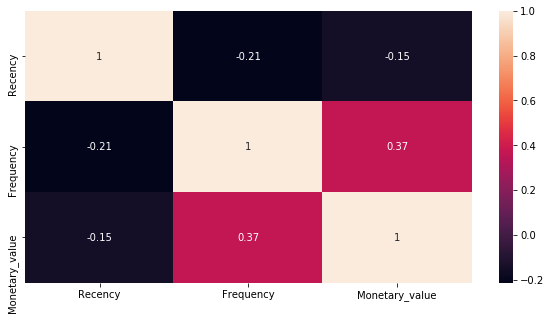

In [46]:
plt.subplots(figsize=(10,5))
sns.heatmap(rfm_data.corr(),annot=True)
plt.show()

#### Visualize feature distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the three features present in the RFM data.

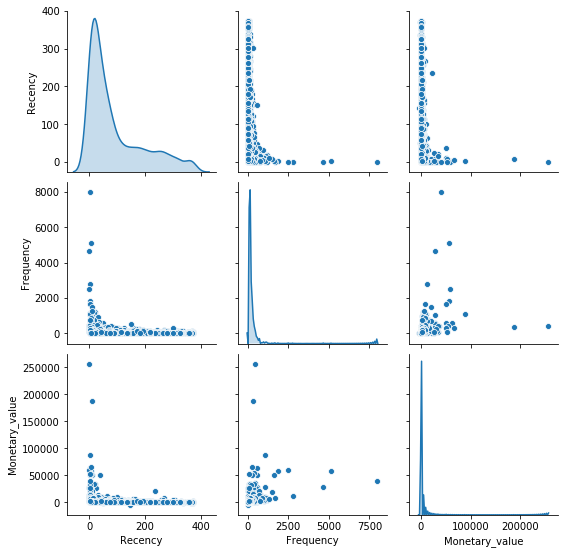

In [47]:
import seaborn as sns
sns.pairplot(rfm_data,diag_kind='kde')
plt.show()

#### We can notice that we have a skewed distribution of the 3 variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

In [48]:
rfm_data

,Recency,Frequency,Monetary_value
CustomerID,,,
12346.0,325.105556,2.0,0.00
12747.0,1.927083,103.0,4196.01
12748.0,0.020139,4642.0,29072.10
12749.0,3.120139,231.0,3868.20
12820.0,2.900694,59.0,942.34
...,...,...,...
18280.0,277.122917,10.0,180.60
18281.0,180.080556,7.0,80.82
18282.0,7.045833,13.0,176.60


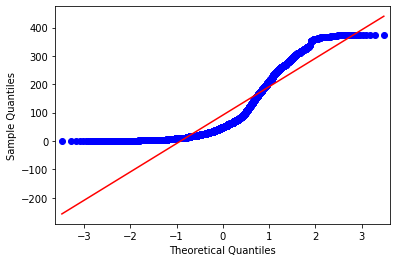

In [49]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
qqplot(rfm_data["Recency"], line='s')
pyplot.show()

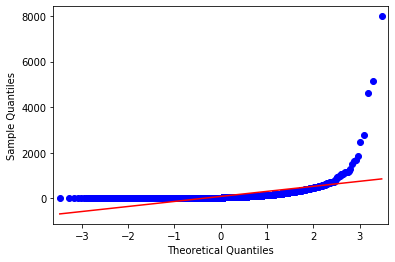

In [50]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
qqplot(rfm_data["Frequency"], line='s')
pyplot.show()

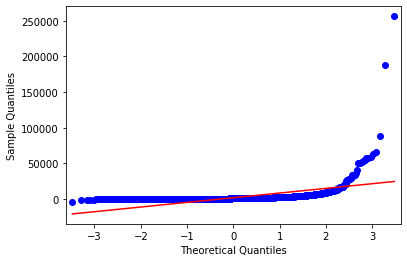

In [51]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
qqplot(rfm_data["Monetary_value"], line='s')
pyplot.show()

In [52]:
df_scaled = rfm_data.copy()
col_names = ['Recency', 'Frequency','Monetary_value']
features = df_scaled[col_names]

In [53]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Recency,Frequency,Monetary_value
CustomerID,,,
12346.0,1.611750,-2.044423,-0.429111
12747.0,-1.713712,0.718363,0.657501
12748.0,-2.182051,3.812028,4.567465
12749.0,-1.544825,1.360060,0.589980
12820.0,-1.572461,0.282016,-0.094878
...,...,...,...
18280.0,1.455968,-1.045712,-0.338935
18281.0,1.054398,-1.291943,-0.381700
18282.0,-1.187461,-0.858616,-0.340529


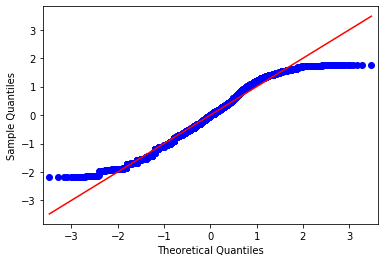

In [54]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
qqplot(df_scaled["Recency"], line='s')
pyplot.show()

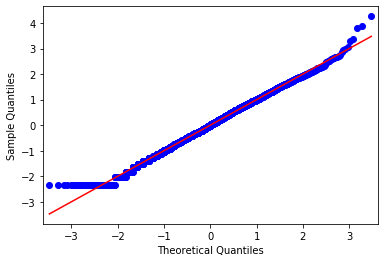

In [55]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
qqplot(df_scaled["Frequency"], line='s')
pyplot.show()

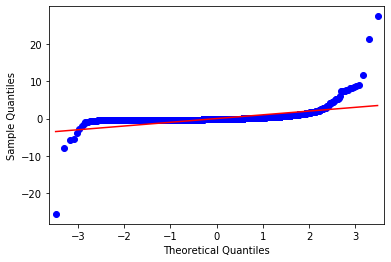

In [56]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
qqplot(df_scaled["Monetary_value"], line='s')
pyplot.show()

###### Now data is normally distributed

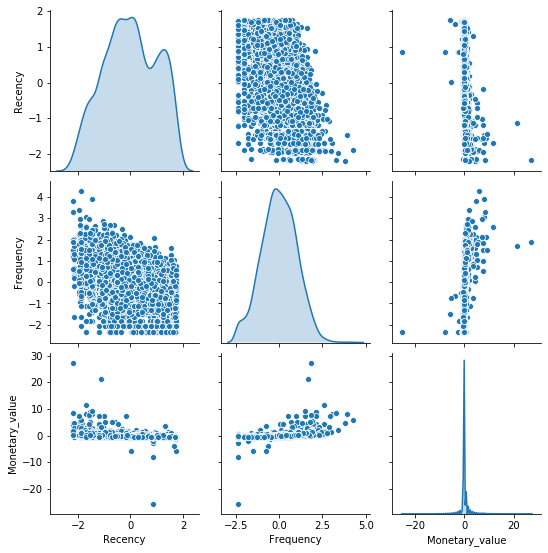

In [57]:
import seaborn as sns
sns.pairplot(df_scaled,diag_kind='kde')
plt.show()

In [58]:
df_scaled.corr()

,Recency,Frequency,Monetary_value
Recency,1.000000,-0.506062,-0.288113
Frequency,-0.506062,1.000000,0.406305
Monetary_value,-0.288113,0.406305,1.000000


### K-means Implementation

A common challenge with k-means is that you must tell it how many clusters you expect. Figuring out how many clusters we need is not obvious from data, thus we will try different clusters numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). The [elbow](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_elbow_method) method can be used to determine the number of clusters as well.

**Note:** K-means is sensitive to initializations because those initializations are critical to quality of optima found. Thus, we will use smart initialization called ***k-means++***.

In [59]:
X=df_scaled

In [60]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:16]

,num_clusters,cluster_errors
0,1,11850.000000
1,2,7501.101965
2,3,5897.619683
3,4,4866.494323
4,5,4145.978899
5,6,3511.430286
6,7,2901.771484
7,8,2478.937614
8,9,2134.825572
9,10,1928.380415


In [61]:
errors = clusters_df['cluster_errors']

In [62]:
for i in range(13):
    print(errors[i+1]-errors[i])

-4348.898035231183
-1603.4822821593298
-1031.1253595878497
-720.5154237275738
-634.5486129286292
-609.6588025868045
-422.83386943721234
-344.11204216521537
-206.44515758782973
-158.3992949362489
-148.1504581934555
-116.58221627829676
-115.74813219847351


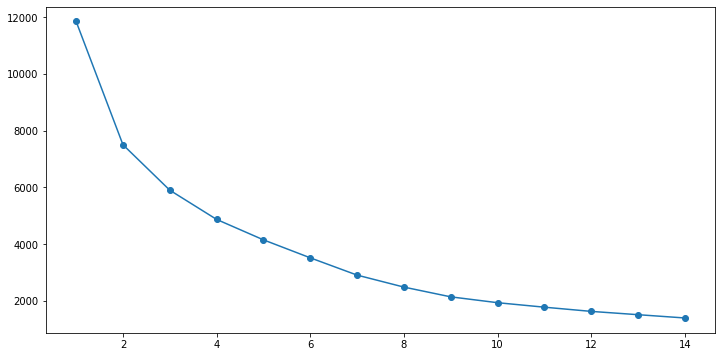

In [63]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [64]:
# Number of clusters
kmeans = KMeans(n_clusters=2,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 0.64572233 -0.62669245 -0.26397561]
 [-0.80844141  0.78461609  0.33049625]]


In [65]:
colnames =['Recency', 'Frequency','Monetary_value']
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [66]:
X_df.head()

,Recency,Frequency,Monetary_value,group
CustomerID,,,,
12346.0,1.611750,-2.044423,-0.429111,0
12747.0,-1.713712,0.718363,0.657501,1
12748.0,-2.182051,3.812028,4.567465,1
12749.0,-1.544825,1.360060,0.589980,1
12820.0,-1.572461,0.282016,-0.094878,1


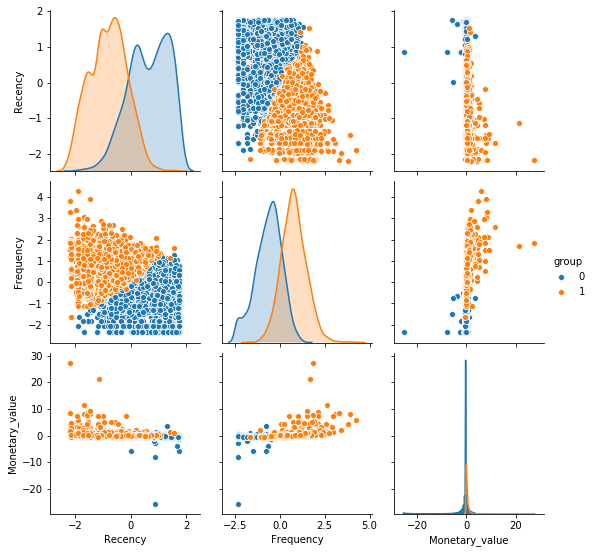

In [67]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000246B73C6E08>,
      dtype=object)

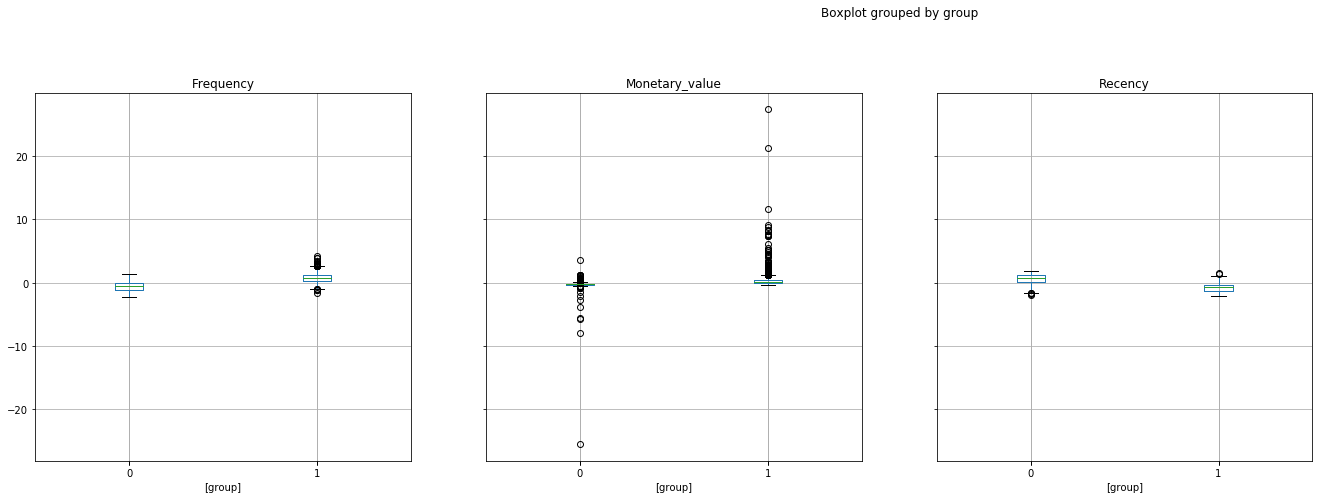

In [68]:
X_df.boxplot(by = 'group',layout=(2,4), figsize=(30, 15))

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3979417349272943


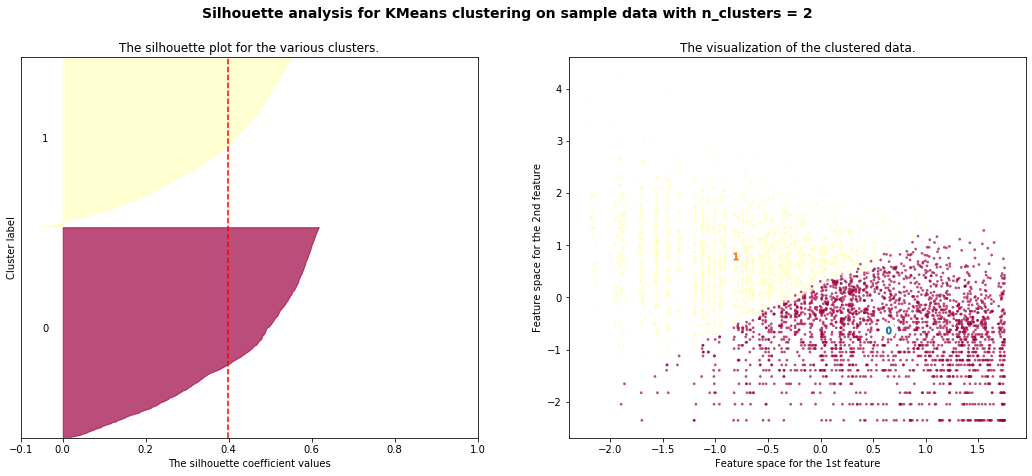

For n_clusters = 3 The average silhouette_score is : 0.40450709859819034


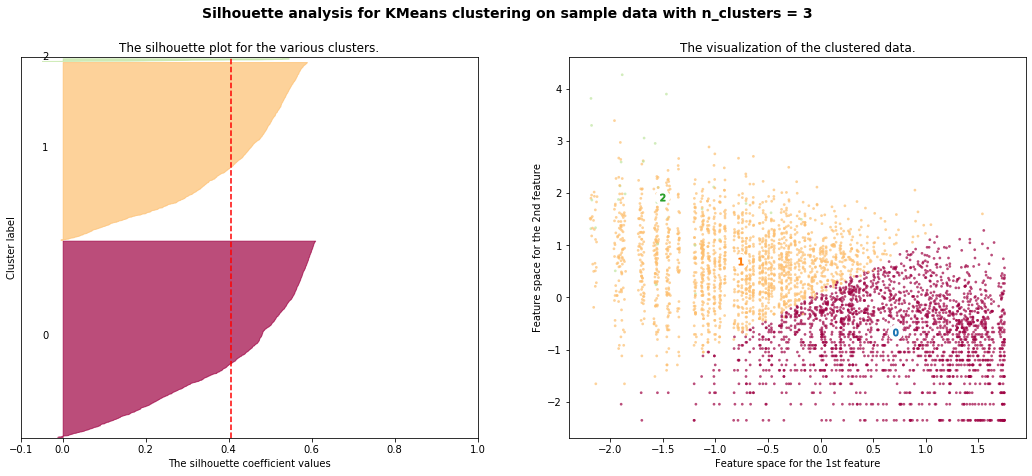

For n_clusters = 4 The average silhouette_score is : 0.3190242748627801


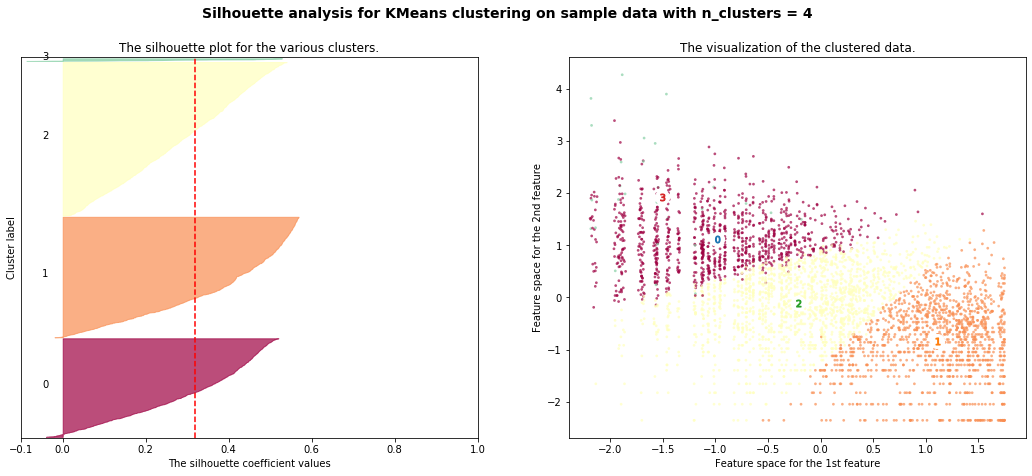

For n_clusters = 5 The average silhouette_score is : 0.3243109638030996


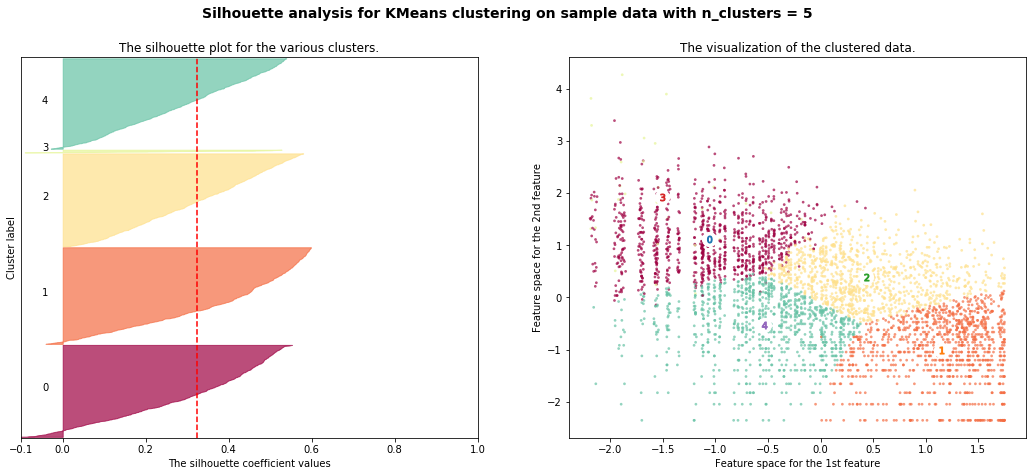

For n_clusters = 6 The average silhouette_score is : 0.32584341278970835


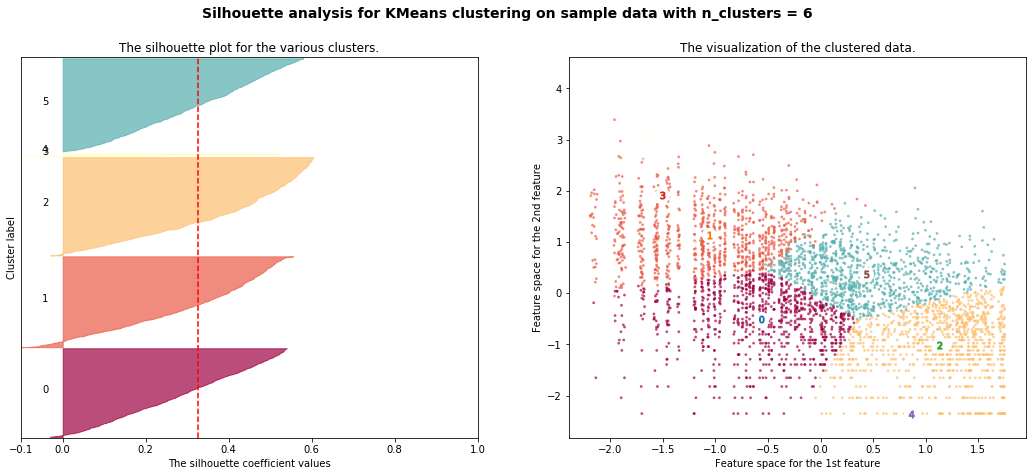

In [69]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_df.drop('group',axis=1).values
y=X_df['group'].values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [70]:
from sklearn.cluster import AgglomerativeClustering 

In [71]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [72]:
model2.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

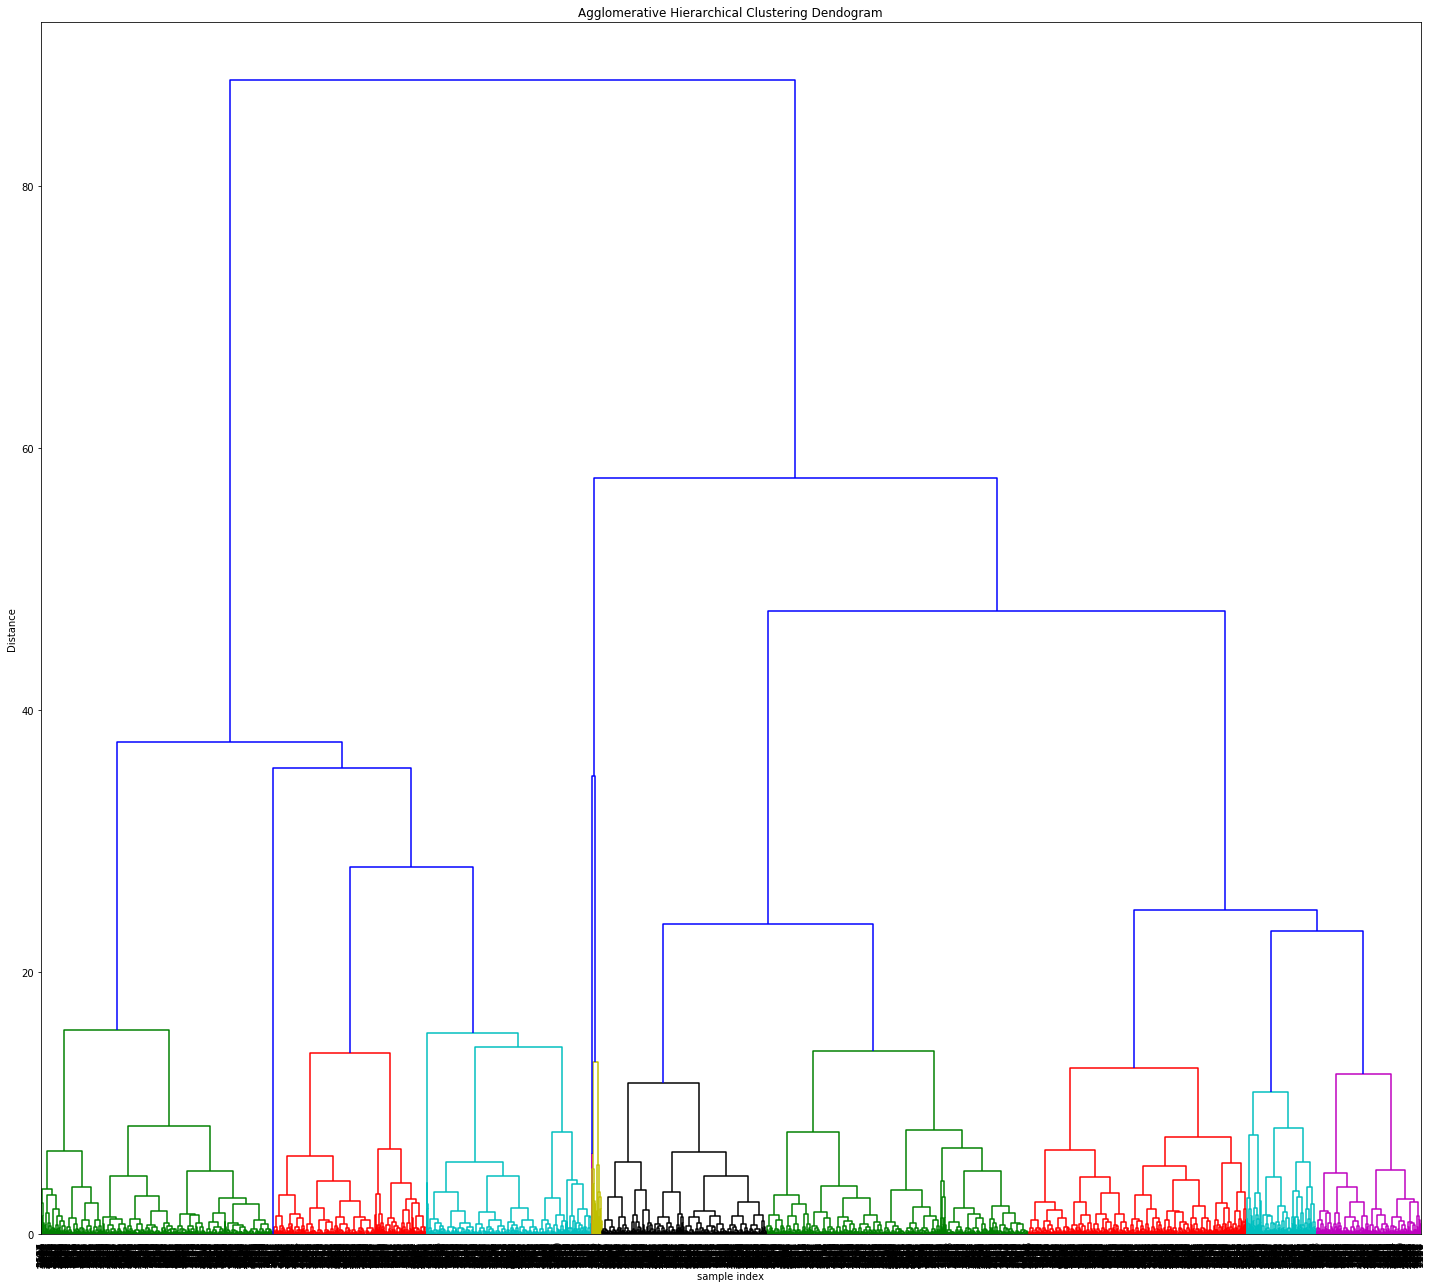

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(20, 18))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [74]:
#Applying PCA
from sklearn.decomposition import PCA
X=df_scaled
pca=PCA(n_components=2)
X = pca.fit_transform(X)

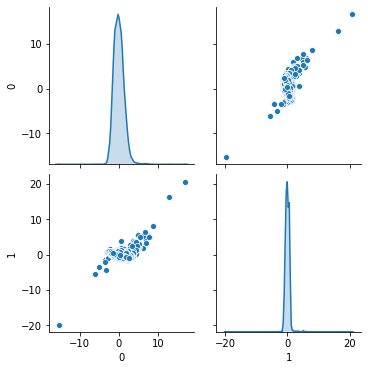

In [75]:
sns.pairplot(pd.DataFrame(X),diag_kind='kde')

In [76]:
pca.explained_variance_ratio_

array([0.6022887 , 0.24091001])

In [77]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,9991.904622
1,2,5646.294980
2,3,4099.921820
3,4,3082.962368
4,5,2477.904981
5,6,1923.142730
6,7,1488.424365
7,8,1277.178142
8,9,1111.448107
9,10,998.267370


In [78]:
errors = clusters_df['cluster_errors']

In [79]:
for i in range(8):
    print(errors[i+1]-errors[i])

-4345.609642405878
-1546.3731598115191
-1016.9594513664856
-605.0573873562362
-554.7622511290365
-434.71836521164073
-211.24622247737148
-165.7300354516292


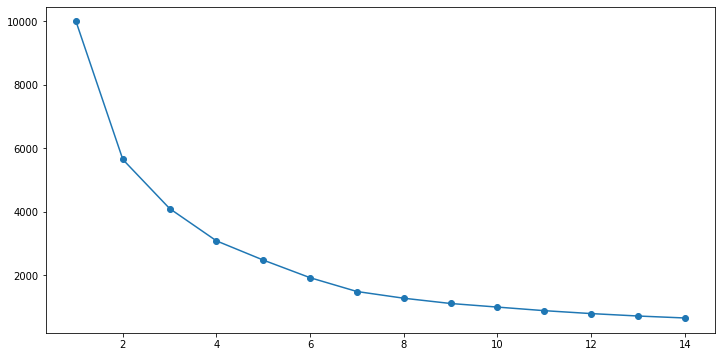

In [80]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [81]:
# Number of clusters
kmeans = KMeans(n_clusters=2,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.90798364  0.25346885]
 [ 1.12404774 -0.31378438]]


In [82]:
colnames = ["PC1", "PC2"]
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [83]:
X_df.head()

,PC1,PC2,group
0,-2.437514,0.873938,0
1,1.785519,-0.548459,1
2,6.035114,1.887250,1
3,2.054244,-0.603275,1
4,1.037701,-1.011915,1


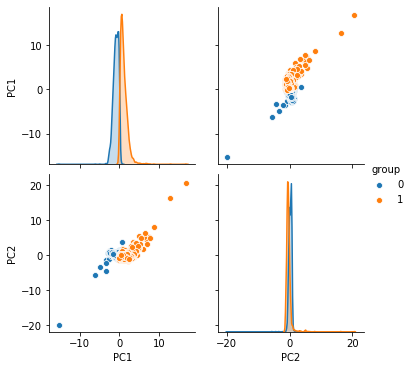

In [84]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000246C31D2488>,
      dtype=object)

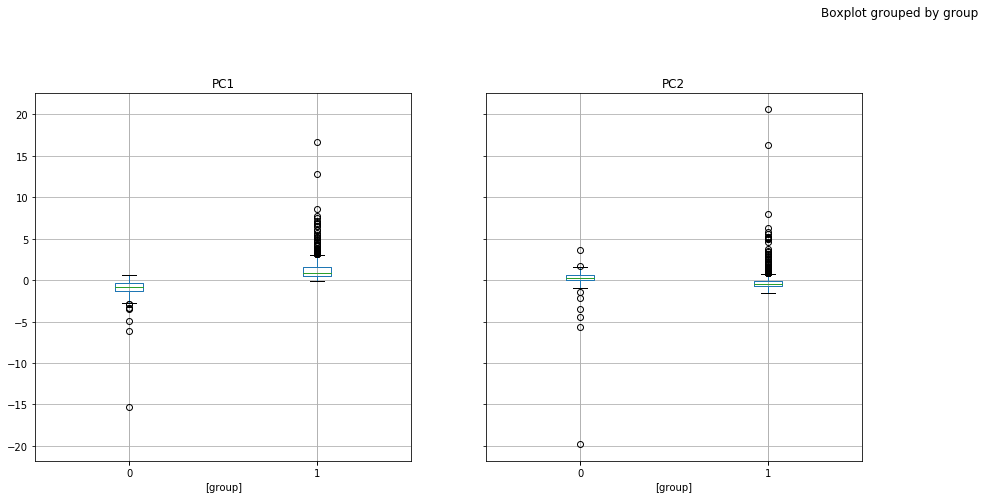

In [85]:
X_df.boxplot(by = 'group',layout=(2,4), figsize=(30, 15))

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.4898776414299532


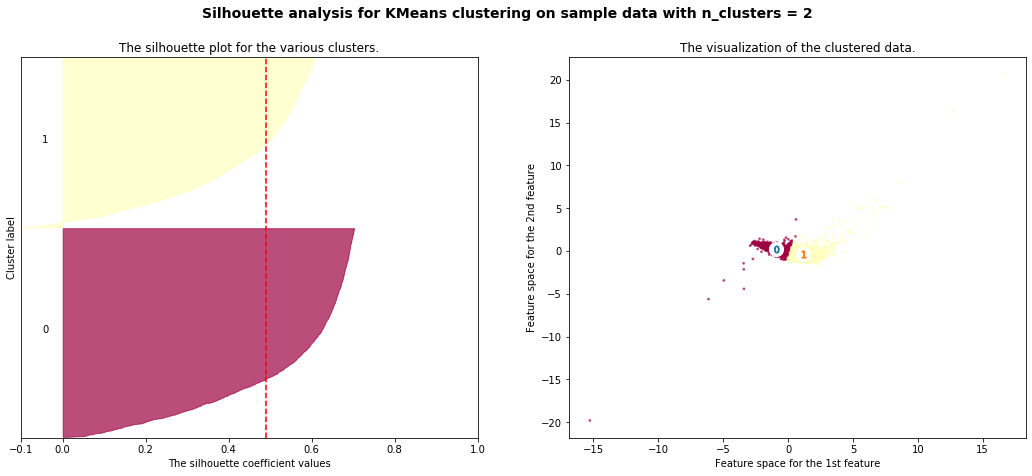

For n_clusters = 3 The average silhouette_score is : 0.5009777951949648


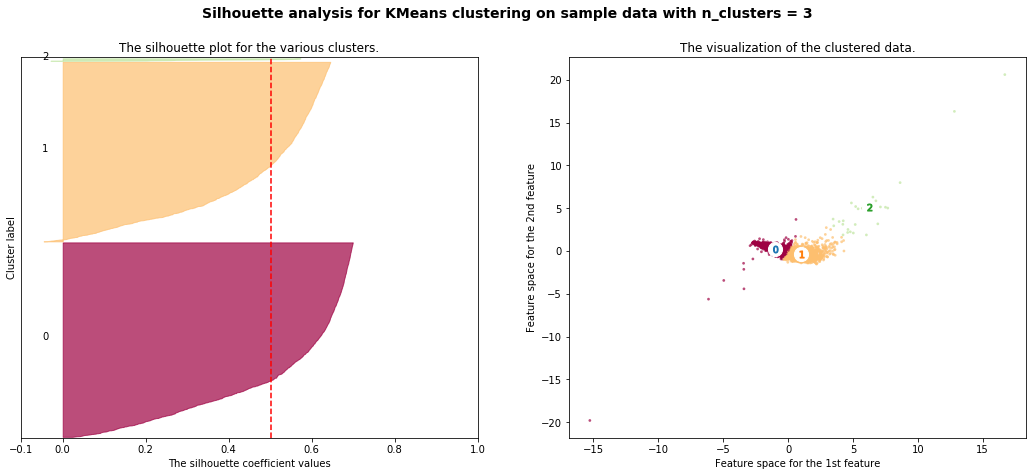

For n_clusters = 4 The average silhouette_score is : 0.435776072217406


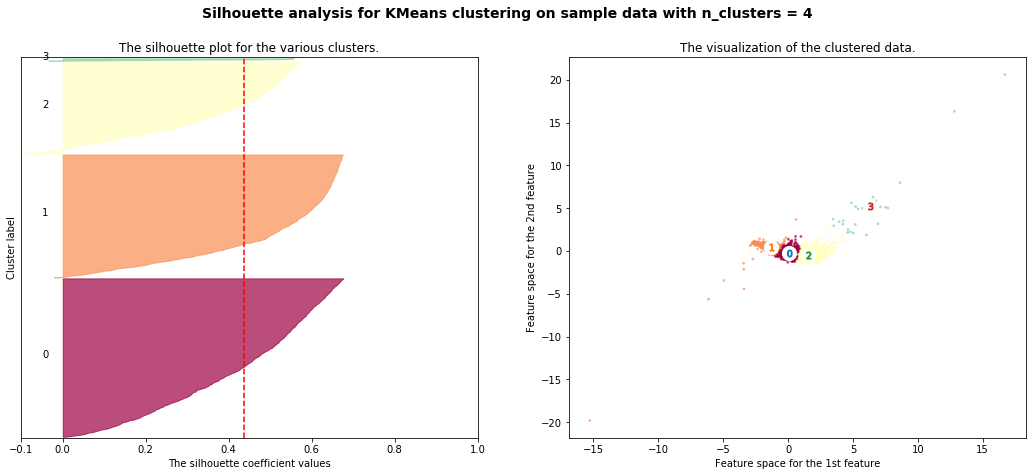

For n_clusters = 5 The average silhouette_score is : 0.43790584657873494


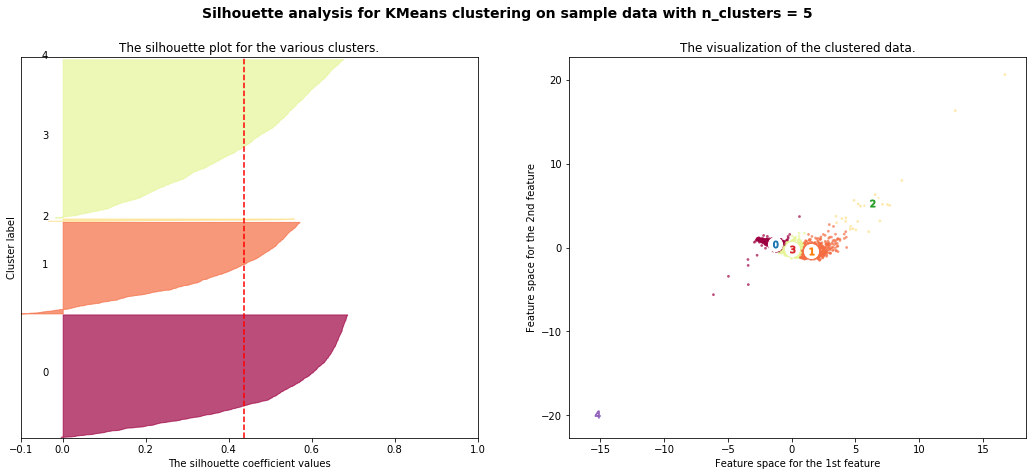

For n_clusters = 6 The average silhouette_score is : 0.43932792837620277


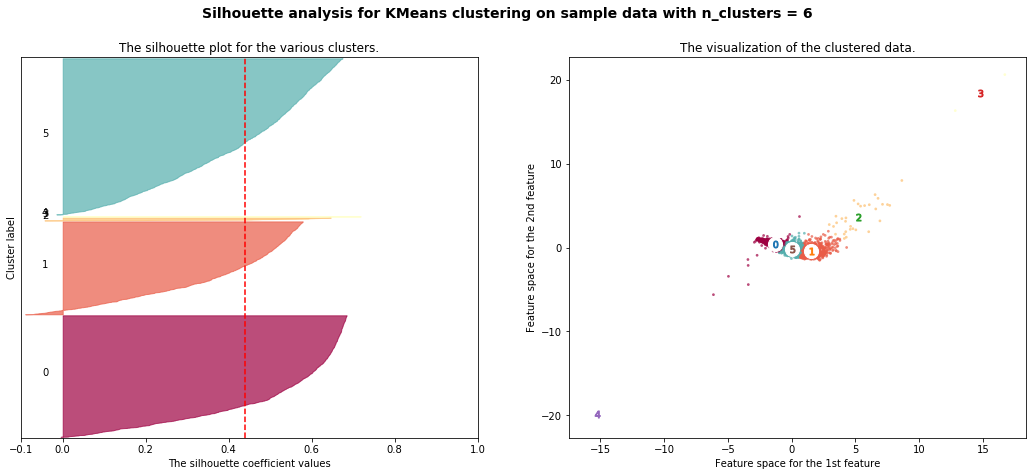

In [86]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_df.drop('group',axis=1).values
y=X_df['group'].values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [87]:
from sklearn.cluster import AgglomerativeClustering 

In [88]:
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')

In [89]:
model2.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

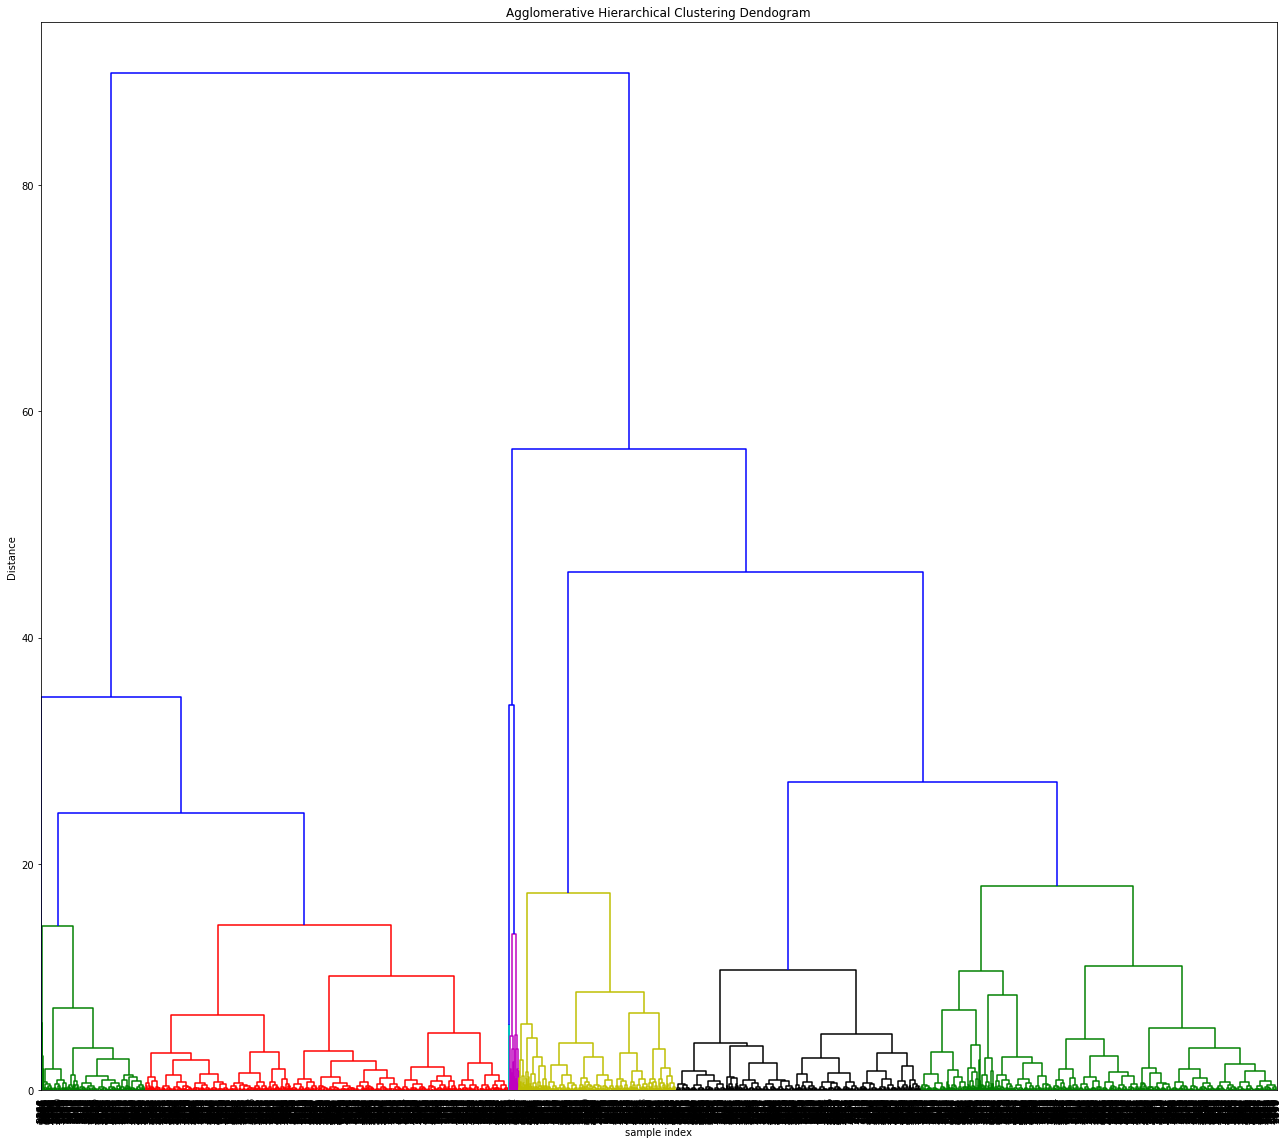

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [91]:
#Applying PCA
X=df_scaled
pca=PCA(n_components=1)
X = pca.fit_transform(X)

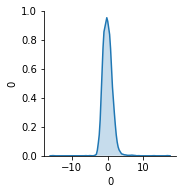

In [92]:
sns.pairplot(pd.DataFrame(X),diag_kind='kde')

In [93]:
pca.explained_variance_ratio_

array([0.6022887])

#### pc1 explained 60% of data lies in principal component 1 only

In [94]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,7137.121045
1,2,3069.143450
2,3,1945.207690
3,4,1405.909581
4,5,1014.382822
5,6,808.913942
6,7,628.904896
7,8,480.479007
8,9,361.593188
9,10,293.215654


In [95]:
errors = clusters_df['cluster_errors']

In [96]:
for i in range(8):
    print(errors[i+1]-errors[i])

-4067.9775947818375
-1123.9357603658823
-539.2981093845906
-391.5267586290065
-205.46887981317127
-180.00904649428344
-148.42588889281046
-118.88581834695651


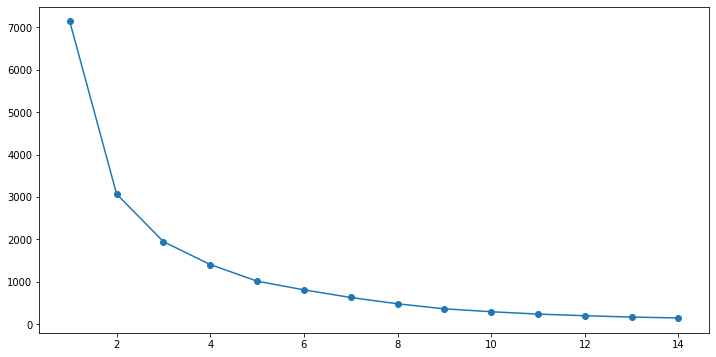

In [97]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [98]:
# Number of clusters
kmeans = KMeans(n_clusters=2,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 1.18269721]
 [-0.87077707]]


In [99]:
colnames = ["PC1"]
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [100]:
X_df.head()

,PC1,group
0,-2.437514,1
1,1.785519,0
2,6.035114,0
3,2.054244,0
4,1.037701,0


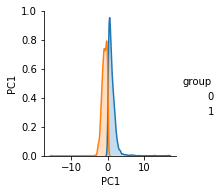

In [101]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000246C1D33D48>,
      dtype=object)

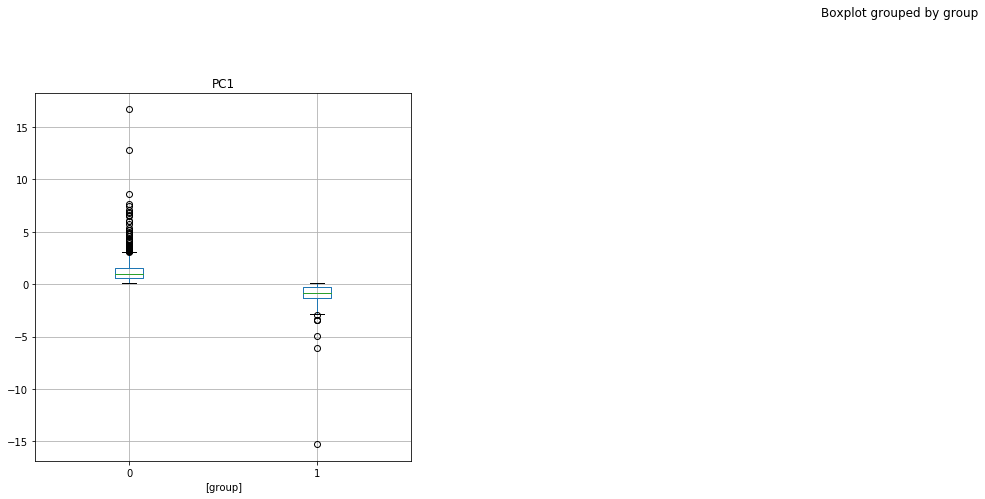

In [102]:
X_df.boxplot(by = 'group',layout=(2,4), figsize=(30, 15))

In [103]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_df.drop('group',axis=1).values
y=X_df['group'].values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)




Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5627583887738181
For n_clusters = 3 The average silhouette_score is : 0.5383692686616417
For n_clusters = 4 The average silhouette_score is : 0.5366838726257399
For n_clusters = 5 The average silhouette_score is : 0.5243454126671027
For n_clusters = 6 The average silhouette_score is : 0.5182612462970657
For n_clusters = 7 The average silhouette_score is : 0.5191300538021567
For n_clusters = 8 The average silhouette_score is : 0.526671238847674
For n_clusters = 9 The average silhouette_score is : 0.5305180912544551
For n_clusters = 10 The average silhouette_score is : 0.5170052864725992
For n_clusters = 11 The average silhouette_score is : 0.5223808479280291
For n_clusters = 12 The average silhouette_score is : 0.5188506984024593
For n_clusters = 13 The average silhouette_score is : 0.523399455990206
For n_clusters = 14 The average silhouette_score is : 0.5251630999699

In [104]:
from sklearn.cluster import AgglomerativeClustering 

In [105]:
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')

In [106]:
model2.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

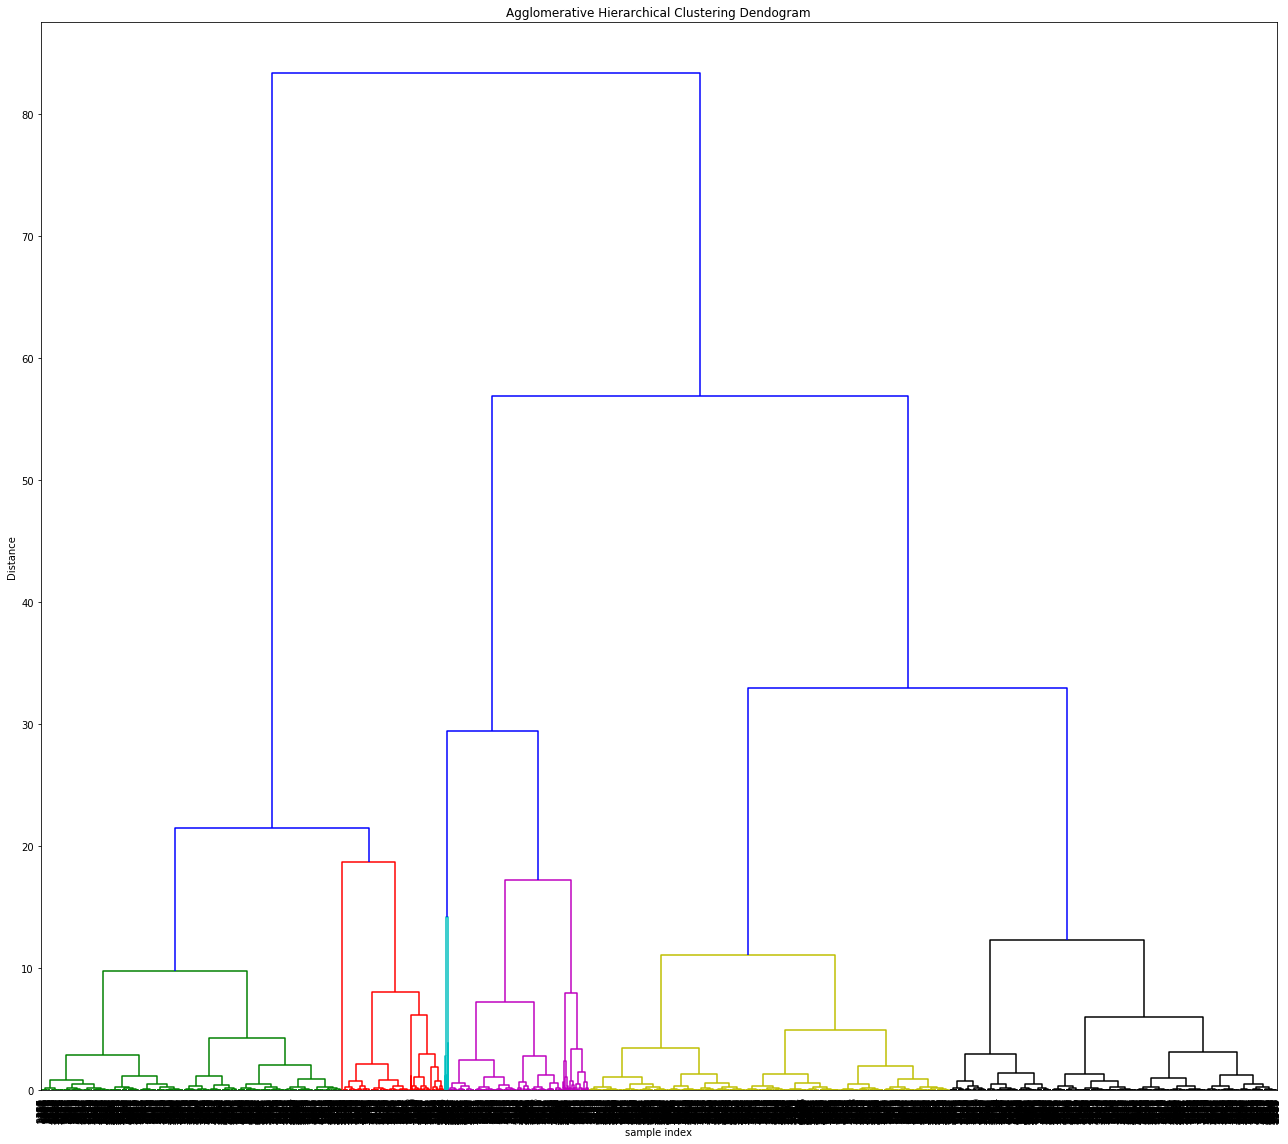

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

The **best silhouette score** obtained is when the **number of clusters is 2**.

**Conclusion - Perspective after applying k-means clustering**:

Unfortunately, we didn't obtain a clearly separated clusters. Clusters assignments are muddled. (It may be due to outliers who weren't removed).

Limitations of k-means clustering:
- There is no assurance that it will lead to the ***global*** best solution.
- Can't deal with **different shapes**(not circular) and consider one point's probability of belonging to more than one cluster.

These disadvantages of k-means mean that for many datasets (especially low-dimensional datasets) it may not perform as well as you might hope. Here comes Guassian Mixture Model (GMM) in help by providing greater flexibility due to clusters having unconstrained covariances and allowing probabilistic cluster assignment.
